In [1]:
#Estudo de gradient boosting, ROC e AUC, confusion matrix,e metricas

from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split

#criação de um modelo simples com uma base do sklearn para avaliação das métricas.

cancer_data = load_breast_cancer()
cancer_data


{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [2]:
import pandas as pd
pd_cancer = pd.DataFrame(cancer_data.data,columns=cancer_data.feature_names)
pd_cancer['target'] = cancer_data.target
pd_cancer.head()

X = pd_cancer.drop(['target'],axis=1)
y = pd_cancer['target']



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [4]:
#Gradient Boosting é um modelo Ensamble pra classificação e regressão, cria uma corrente de modelos "fracos" onde cada um minimiza o erro do anterior por meio
#de uma função de perda

#cada modelo fraco é multiplicado por uma taxa de aprendizagem

#Passos:

#Modelo criado com aproximação simples > Resíduo (distancia entre o predito e o real) > próximo modelo é criado e gerado em cima do último resíduo
#modelo com o menor resíduo possível


model = GradientBoostingClassifier()
model.fit(X_train, y_train)
print('Acurácia %0f' % model.score(X_test, y_test))
#Acurácia 0.957447

Acurácia 0.957447


In [5]:
#sempre utilizar um numero pequeno de learning rate, 0.1, já é o defeaut

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np


#retreinando com parâmetros de 200 arvores e coletando os erros

model = GradientBoostingClassifier(max_depth=2, n_estimators=200, learning_rate=0.1)
model.fit(X_train, y_train)
errors = [mean_squared_error(y_test, y_pred) for y_pred in model.staged_predict(X_test)]

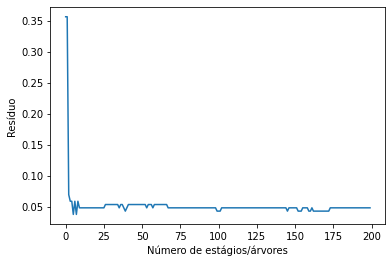

Acurácia 0.952128


In [6]:
plt.plot(errors)
plt.ylabel('Resíduo')
plt.xlabel('Número de estágios/árvores')
plt.show()
print('Acurácia %0f' % model.score(X_test, y_test))

#da pra ver que logo no começo se atinge os menores níveis de resíduo

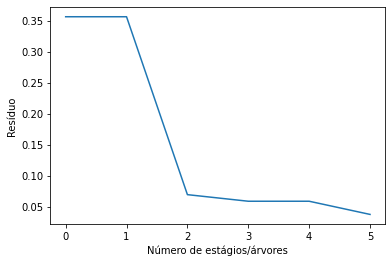

Acurácia 0.962766


In [7]:
#Feito isso, o modelo é retreinado com os parâmetros ideais:

best_n_estimators = np.argmin(errors) + 1
best_n_estimators
best_model = GradientBoostingClassifier(max_depth=2, n_estimators=best_n_estimators)
best_model.fit(X_train, y_train)
errors_best_model = [mean_squared_error(y_test, y_pred) for y_pred in best_model.staged_predict(X_test)]

plt.plot(errors_best_model)
plt.ylabel('Resíduo')
plt.xlabel('Número de estágios/árvores')
plt.show()
print('Acurácia %0f' % best_model.score(X_test, y_test))

[[ 63   4]
 [  3 118]]


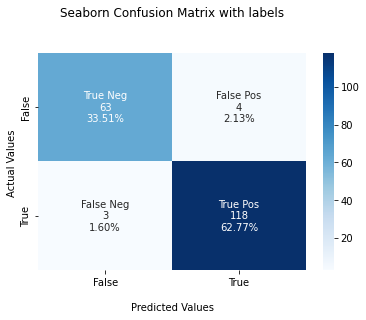

In [8]:
#Estudo da confusion matrix e ROC/AUC

from sklearn.metrics import confusion_matrix
import seaborn as sns
y_pred = best_model.predict(X_test)
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

#visualizando melhor

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()


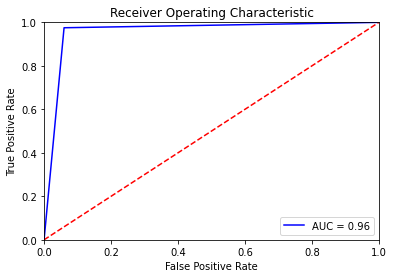

In [9]:
#plotando a curva ROC

import sklearn.metrics as metrics

preds = y_pred
preds

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)


# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#A curva ROC é uma plotagem para visualizar a relação entre os verdadeiros positivos e os falsos positivos - queremos sempre um número alto de
#verdadeiros positivos e baixos falso positivos. o AUC é a área abaixo dessa cuva, quando mais próximo de 1 melhor é a relação 


In [10]:
#Métricas de avaliação - Confusion Matrix   
cf_matrix = confusion_matrix(y_test, y_pred)
tp = cf_matrix[1,1]
fp = cf_matrix[0,1]
fn = cf_matrix[1,0]
tn = cf_matrix[0,0]
#Acurácia - Taxa de acertos no geral:

print('Acurácia:', (tp+tn)/(tp+tn+fn+fp))

#Sensibilidade:
#É tipo a "Acurácia" dos acertos positivos. A capacidade que o modelo teve de acertar valores positivos. É a mesma coisa que Recall
#Dentre todas as situações de classe Positivo como valor esperado, quantas estão corretas
#O recall pode ser usada em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos.

print('Sensitividade:', tp/(tp+fn))
recall = tp/(tp+fn)

#Especificidade:
#É tipo a "acurácia" do modelo em detectar valores negativos.

print('Especificidade:', tn/(tn+fp))

#Precision:
#É tipo a acurácia dos acertos positivos sobre o total de positivos, "a precisão do modelo em acertos positivos"
#A precisão pode ser usada em uma situação em que os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos.

print('Precision:', tp/(tp+fp))
precision = tp/(tp+fp)
#F1 Score
# é a media harmoica entre precision e recall
print('F1 Score:', 2*(precision*recall)/(precision+recall))


#função de métricas do sklearn que trás todas essas informações.
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


Acurácia: 0.9627659574468085
Sensitividade: 0.9752066115702479
Especificidade: 0.9402985074626866
Precision: 0.9672131147540983
F1 Score: 0.9711934156378601
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        67
           1       0.97      0.98      0.97       121

    accuracy                           0.96       188
   macro avg       0.96      0.96      0.96       188
weighted avg       0.96      0.96      0.96       188

